In [38]:
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
ex = pd.read_csv('../data/ALL_EXHIBITIONS.csv', sep=';', encoding='utf-8', low_memory=False)
art = pd.read_csv('../data/ALL_ARTWORKS.csv', sep=',', encoding='utf-8', low_memory=False)

In [42]:
art1 = art.dropna(subset=['title'])
print(art.shape, art1.shape)

array(["Musée national d'art moderne / Centre de création industrielle",
       'Frac Franche-Comté', 'Frac Ile-de-France',
       "Fonds municipal d'art contemporain de la Ville de Paris",
       "Musée d'art moderne et contemporain de Saint-Etienne Métropole",
       "Musée d'art moderne de la Ville de Paris",
       "Centre national des arts plastiques/Fonds national d'art contemporain",
       "Musée d'Art moderne et contemporain de la Ville de Strasbourg",
       'Frac Occitanie Montpellier', 'Frac Normandie Caen',
       "La Piscine, Musée d'art et d'industrie André Diligent, Roubaix",
       'Frac Normandie Rouen', 'Frac Bretagne',
       'Musée Cantini, Marseille', 'Frac Aquitaine', 'Frac Picardie',
       'Frac Alsace', "Musée d'arts de Nantes", 'Frac Corse',
       "Musée d'art moderne, Céret",
       "Fonds communal d'art contemporain, Marseille",
       'Musée de Grenoble', 'les Abattoirs, Toulouse',
       'Musée Bourdelle, Paris', 'Frac-Artothèque du Limousin',
       'Mu

In [156]:
G = nx.Graph()
exhib_matrix = {}
for ind, e in ex.iterrows():
    if ind % 5000 == 0:
        print("%i / %i, graphe : %i" % (ind, len(ex), len(G.nodes)))
    e_list = re.split(r'\|', e['artworks'])
    if len(e_list) > 1:
        G.add_node(str(ind), name=e['title'])
        exhib_matrix[str(ind)] = e_list
        for a in e_list:
            # aa = art[art["_id"] == int(a)]["collection"].tolist()[0]
            for other_exhib in exhib_matrix:
                if str(ind) != str(other_exhib) and not G.has_edge(str(ind), str(other_exhib)):
                    if a in exhib_matrix[other_exhib]:
                        G.add_edge(str(ind), str(other_exhib), weight = 1)

0 / 91807, graphe : 0
5000 / 91807, graphe : 3083
10000 / 91807, graphe : 5650
15000 / 91807, graphe : 8345
20000 / 91807, graphe : 11041
25000 / 91807, graphe : 13136
30000 / 91807, graphe : 15267
35000 / 91807, graphe : 17256
40000 / 91807, graphe : 18634
45000 / 91807, graphe : 20193
50000 / 91807, graphe : 21612
55000 / 91807, graphe : 23168
60000 / 91807, graphe : 24997
65000 / 91807, graphe : 26184
70000 / 91807, graphe : 27422
75000 / 91807, graphe : 28575
80000 / 91807, graphe : 29657
85000 / 91807, graphe : 30667
90000 / 91807, graphe : 31907


In [180]:
print("Before removing isolates:", len(G.nodes), len(G.edges), nx.number_of_isolates(G))
G2 = G.copy()
G2.remove_nodes_from(list(nx.isolates(G2)))
print("After removing isolates:", len(G2.nodes), len(G2.edges), nx.number_of_isolates(G2))
G3 = G2.subgraph(np.random.choice(G2.nodes, 20000, False)).copy()
G3.remove_nodes_from(list(nx.isolates(G3)))
print("Subgraph:", len(G3.nodes), len(G3.edges), nx.number_of_isolates(G3))

Before removing isolates: 32259 407469 2842
After removing isolates: 29417 407469 0
Subgraph: 19317 187329 0


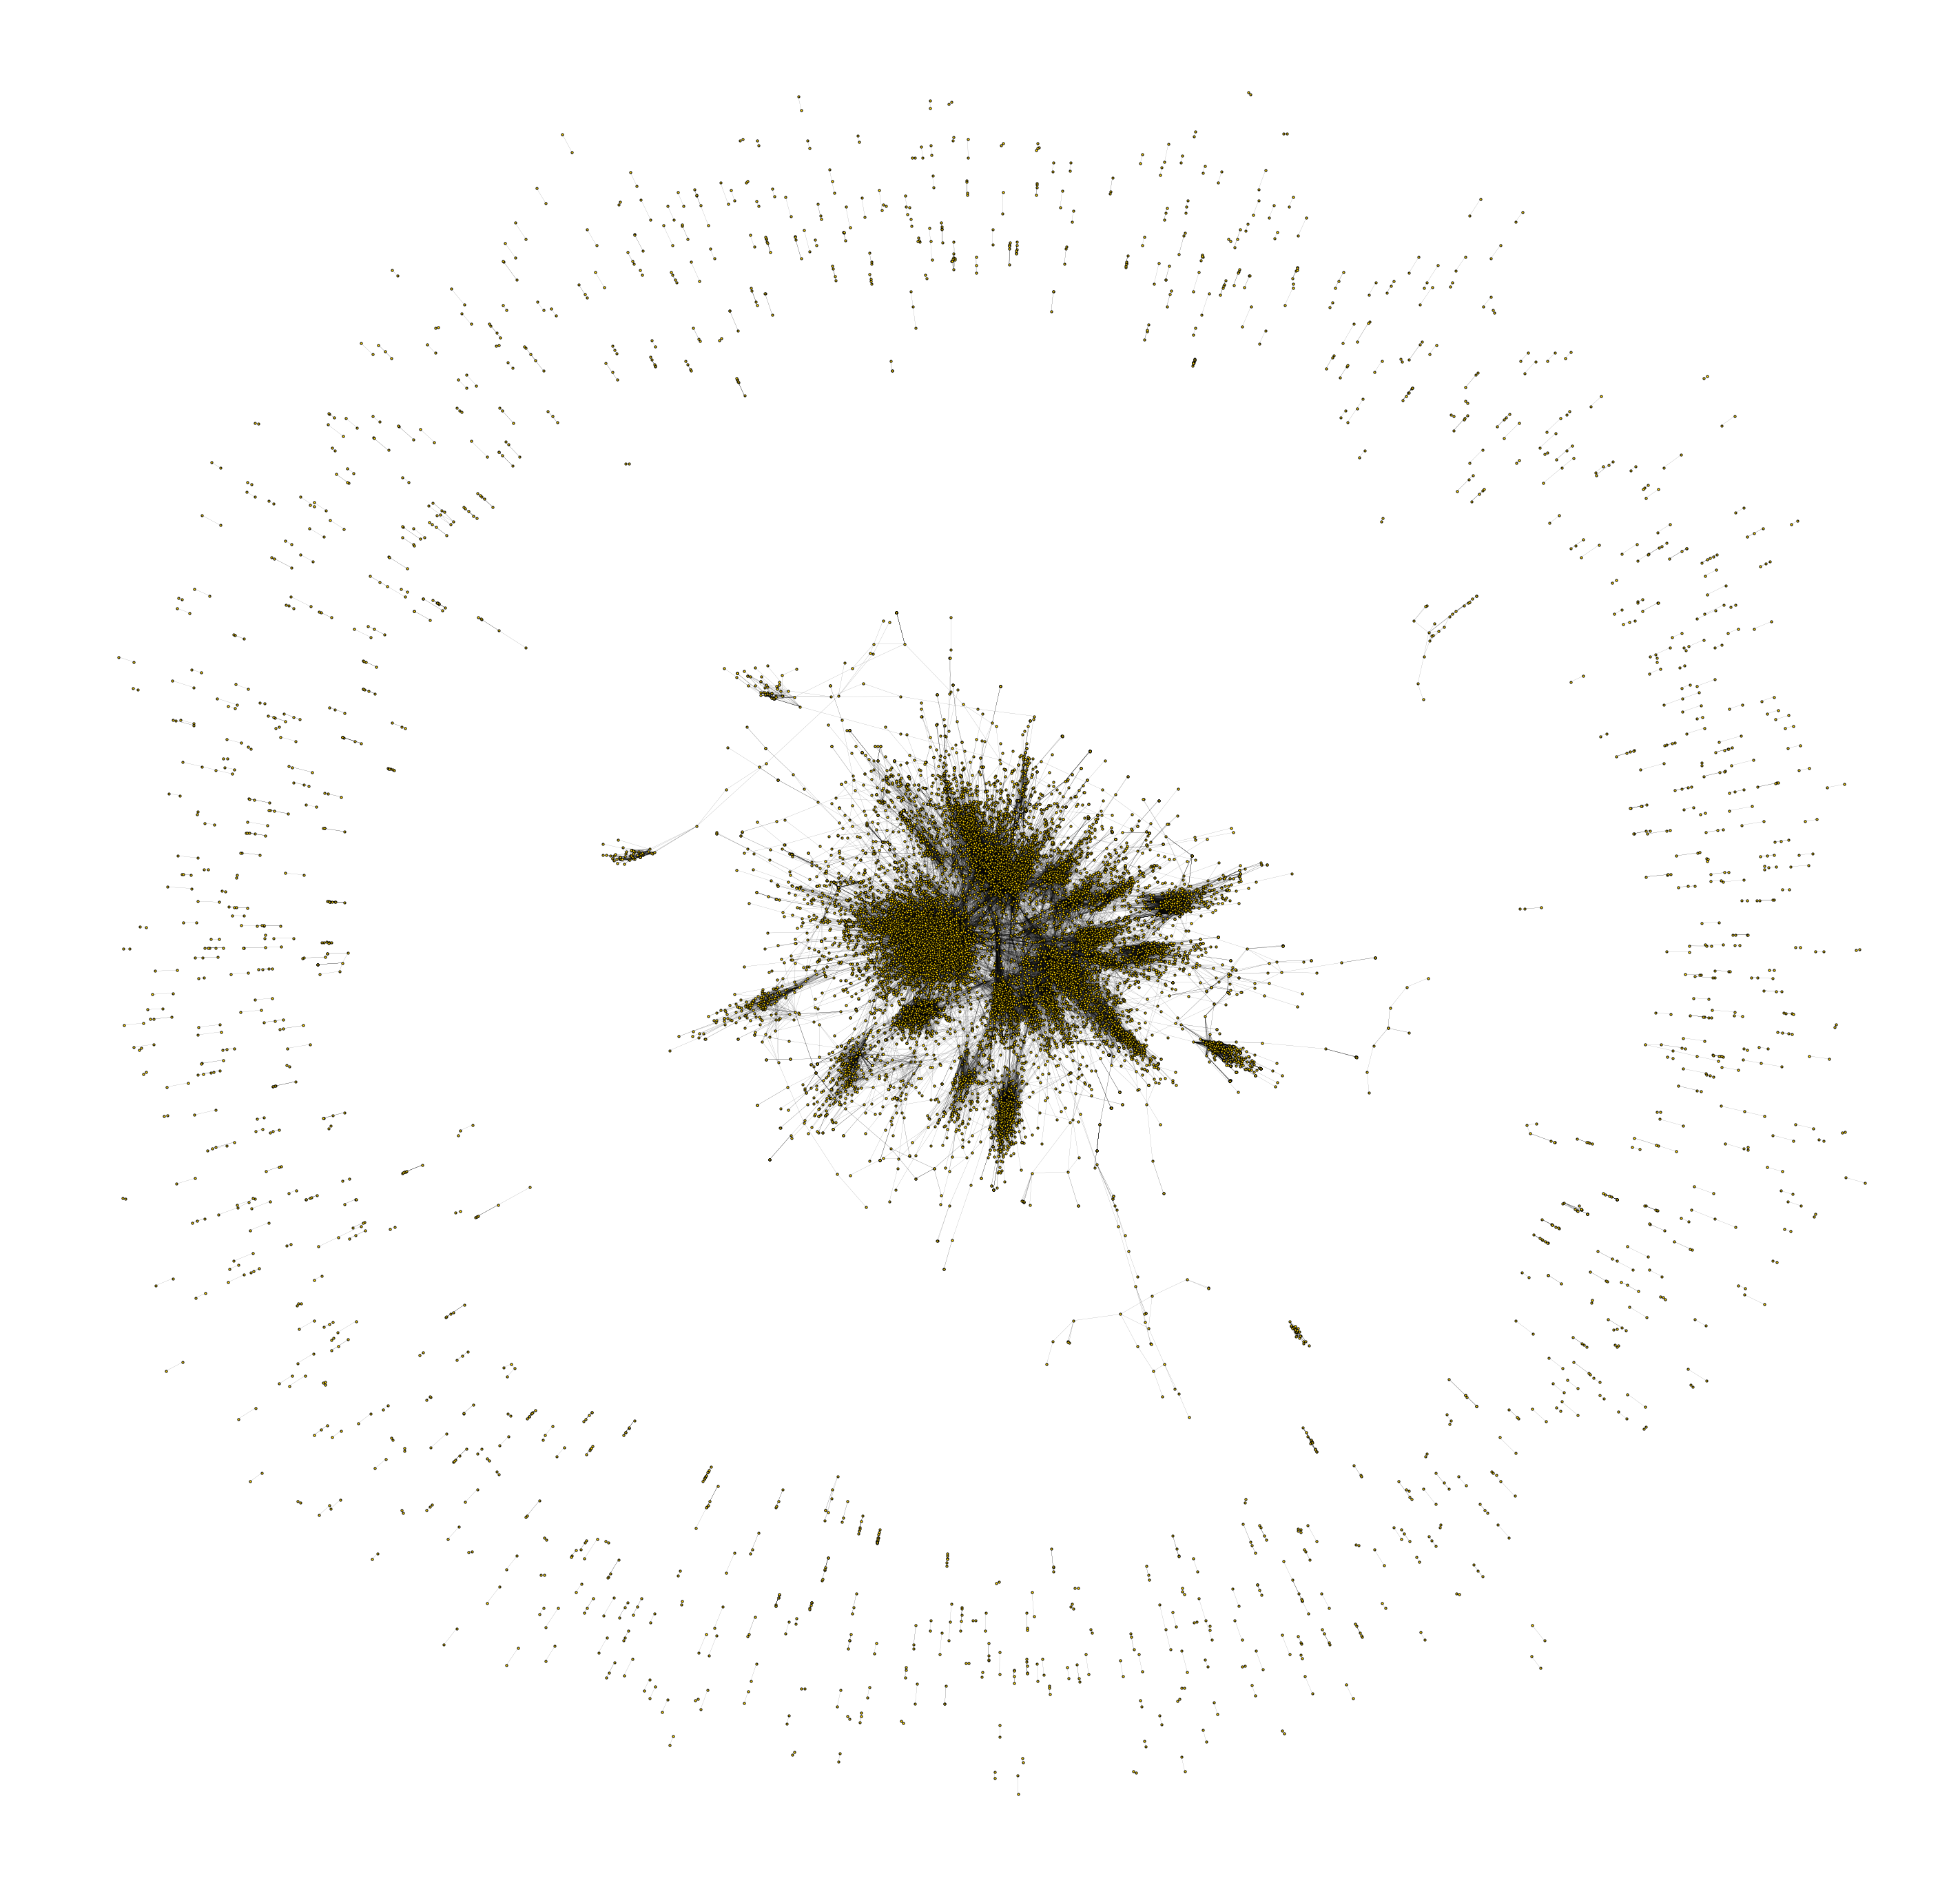

In [181]:
colors = plt.get_cmap("tab10")
pos = nx.spring_layout(G3, k=0.01)
fig, ax = plt.subplots(figsize=(50,50))
nodes = nx.draw_networkx_nodes(G3, pos, nodelist=G3.nodes, node_color="gold", node_size=10)
nodes.set_edgecolor('black')
weights = [G3[u][v]['weight']/10 for u, v in G3.edges]
nx.draw_networkx_edges(G3, pos, width=weights)
plt.axis('off')
plt.savefig("./graph_exhib.pdf", format='pdf', bbox_inches='tight')
# plt.show()